In [5]:
from seq2seq.data.data_manager import Seq2SeqDataManager
from seq2seq.model.seq2seq_learner import Seq2seqLearner
import torch

In [2]:
DEVICE = 'cpu'
MIN_LENGTH = 3
MAX_LENGTH = 10
MIN_COUNT = 3

## Get data
# data_manager=Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt')
data_manager = Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt', min_freq=MIN_COUNT, min_ntoks=MIN_LENGTH,
                                                  max_ntoks=MAX_LENGTH, switch_pair=True, device=DEVICE)

kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1679 sequences
kept 1679 sequences from 1679 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences


0:0:31.12 (1 5.0%) loss train: 4.34 loss valid: 3.57


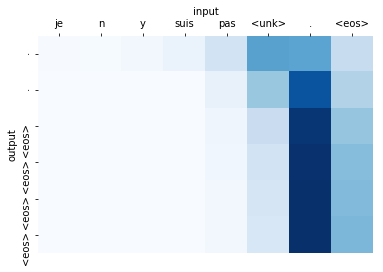

0:0:31.26 (2 10.0%) loss train: 3.4 loss valid: 3.139
0:0:29.49 (3 15.0%) loss train: 3.029 loss valid: 3.064
0:0:22.26 (4 20.0%) loss train: 2.842 loss valid: 3.068
0:0:31.87 (5 25.0%) loss train: 2.601 loss valid: 2.941
0:0:28.98 (6 30.0%) loss train: 2.447 loss valid: 2.75


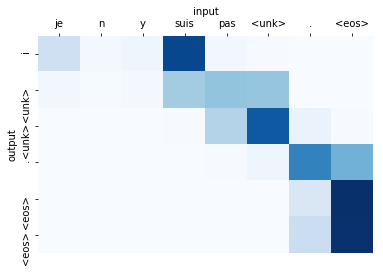

0:0:30.91 (7 35.0%) loss train: 2.316 loss valid: 2.792
0:0:30.18 (8 40.0%) loss train: 2.224 loss valid: 3.314
0:0:29.42 (9 45.0%) loss train: 2.17 loss valid: 2.731
0:0:32.28 (10 50.0%) loss train: 2.055 loss valid: 2.608
0:0:33.53 (11 55.0%) loss train: 1.89 loss valid: 2.213


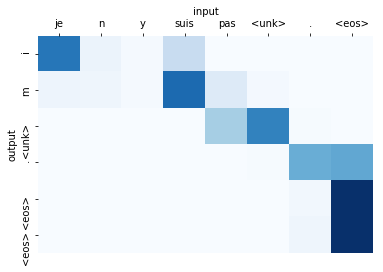

0:0:41.67 (12 60.0%) loss train: 1.797 loss valid: 2.199
0:0:33.3 (13 65.0%) loss train: 1.709 loss valid: 2.129
0:0:28.4 (14 70.0%) loss train: 1.629 loss valid: 2.079
0:0:31.91 (15 75.0%) loss train: 1.562 loss valid: 1.985
0:0:40.74 (16 80.0%) loss train: 1.492 loss valid: 1.916


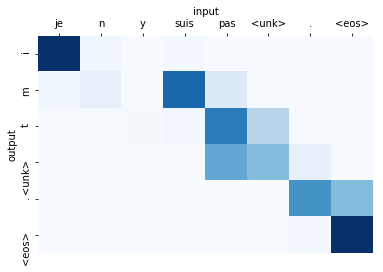

0:0:38.71 (17 85.0%) loss train: 1.423 loss valid: 1.88
0:0:35.16 (18 90.0%) loss train: 1.364 loss valid: 1.915
0:0:34.68 (19 95.0%) loss train: 1.301 loss valid: 1.84
0:0:31.74 (20 100.0%) loss train: 1.25 loss valid: 1.835


In [3]:
hidden_size=50
learner=Seq2seqLearner(data_manager,hidden_size)
learner.fit(20, show_attention_every=5)

In [4]:
original_xtext = 'Je suis sûr.'
original_ytext = 'I am sure.'
predicted_text = learner.predict(original_xtext, device=DEVICE)
print(f'original text: {original_xtext}')
print(f'original answer: {original_ytext}')
print(f'predicted text: {predicted_text}')

original text: Je suis sûr.
original answer: I am sure.
predicted text: i m m . <eos>


In [6]:
torch.save(learner,'sample_model.pth')

In [7]:
model = torch.load('sample_model.pth')

In [8]:
model.predict(original_xtext, device=DEVICE)

'i m m . <eos>'